# Chapter 8: Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
unused = data[["Time", "Amount"]]     #time and amount not helpful for fraud detection
X = data.iloc[:, 1:-2]  
y = data["Class"]        # 0 mean legit and 1 means fraud

In [4]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


### A Simple PCA

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_10D = pca.fit_transform(X)  # returns a np.array
pd.DataFrame(X_10D)
# each principal component has more info than the subsequent ones

,0,1,2,3,4,5,6,7,8,9
0,1.359688,0.069227,-2.537199,1.388244,0.340850,0.475123,0.267006,-0.123142,0.364220,-0.093271
1,-1.191906,-0.267290,-0.166565,0.451234,-0.059561,-0.078678,-0.071737,-0.090685,-0.254869,0.170014
2,1.358559,1.344927,-1.772106,0.365628,0.501499,1.786479,0.766245,-0.229742,-1.518522,-0.214153
3,0.966481,0.192222,-1.791184,-0.881232,0.005213,1.225731,0.197261,-0.347379,-1.387796,0.053910
4,1.158264,-0.877247,-1.548865,0.401536,0.407476,0.093707,0.588085,0.273938,0.817692,-0.758352
...,...,...,...,...,...,...,...,...,...,...
284802,11.881478,-10.062984,9.836674,-2.092370,5.360427,-2.635094,-5.002428,-7.237571,1.917197,-4.360319
284803,0.732798,0.054689,-2.035351,-0.738099,-0.867144,1.058234,0.023343,-0.294638,0.577056,0.962130
284804,-1.919657,0.297956,3.248709,-0.550043,-2.628731,3.040773,-0.276681,-0.724806,0.431370,0.482709
284805,0.240205,-0.537223,-0.703996,0.708411,0.382007,0.646655,-0.639377,-0.718747,0.393224,0.400407


In [6]:
# Number of dimensions needed to explain the 95% variance in the data

pca = PCA()
X_D = pca.fit(X)
cum_sum  = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cum_sum >= 0.95)
d

21

In [7]:
cum_sum

array([0.12483757, 0.21356702, 0.28837636, 0.35360784, 0.41559829,
       0.47335421, 0.52315273, 0.56956969, 0.60884466, 0.64742333,
       0.68132481, 0.71381239, 0.7460451 , 0.77594586, 0.80320759,
       0.82819207, 0.85166522, 0.87452552, 0.89608823, 0.91542731,
       0.93298321, 0.95011992, 0.96280874, 0.97474451, 0.9835865 ,
       0.99115334, 0.99645466, 1.        ])

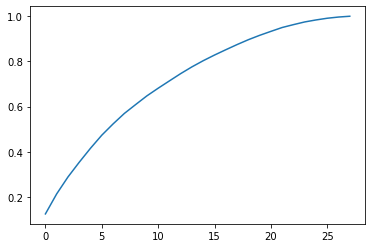

In [8]:
import matplotlib.pyplot as plt

plt.plot(cum_sum)

In [9]:
pca = PCA(n_components=0.95)  # automatically picks the no of dimensions that preserve 95% variance

X_red = pca.fit_transform(X)
pd.DataFrame(X_red)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.359807,0.072781,-2.536347,1.378155,0.338321,0.462388,0.239599,-0.098698,0.363787,-0.090794,...,-0.991390,0.311169,1.468177,-0.470401,-0.207971,-0.025791,-0.403993,-0.251412,0.018307,-0.277838
1,-1.191857,-0.266151,-0.166480,0.448154,-0.060018,-0.082361,-0.078803,-0.085102,-0.255425,0.166974,...,0.489095,0.143772,0.635558,0.463917,0.114805,0.183361,0.145783,0.069083,0.225775,0.638672
2,1.358354,1.340163,-1.773209,0.379780,0.503198,1.800499,0.791461,-0.247676,-1.514654,-0.207643,...,0.717293,0.165946,2.345865,-2.890083,-1.109969,0.121359,2.261857,-0.524980,-0.247998,-0.771679
3,0.966272,0.185226,-1.792993,-0.863291,0.010309,1.247203,0.237609,-0.377436,-1.387024,0.054952,...,0.507757,0.287924,-0.631418,-1.059647,0.684093,-1.965775,1.232622,0.208038,0.108300,-0.005274
4,1.158233,-0.877737,-1.548718,0.403034,0.407193,0.095921,0.592941,0.270533,0.817739,-0.753074,...,1.345852,1.119670,0.175121,-0.451449,0.237033,0.038195,-0.803487,-0.408542,0.009431,-0.798278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,11.881118,-10.071785,9.834783,-2.066656,5.364473,-2.606837,-4.918215,-7.305334,1.914428,-4.356170,...,-0.689256,-4.626942,-0.924459,1.107641,-1.991691,-0.510632,0.682920,-1.475829,-0.213454,-0.111864
284803,0.732789,0.055080,-2.035030,-0.738589,-0.868229,1.058415,0.024330,-0.294869,0.584800,0.975926,...,1.214756,0.675143,1.164931,-0.711757,0.025693,1.221179,1.545556,-0.059616,-0.214205,-0.924384
284804,-1.919565,0.301254,3.249640,-0.557828,-2.630515,3.031260,-0.296827,-0.708417,0.432454,0.484782,...,-0.183699,0.510602,1.329284,0.140716,-0.313502,-0.395652,0.577252,-0.001396,-0.232045,-0.578229
284805,0.240440,-0.530483,-0.702510,0.689799,0.377961,0.623708,-0.686180,-0.679145,0.392087,0.399126,...,-1.042082,-0.449624,1.962563,-0.608577,-0.509928,-1.113981,-2.897849,-0.127434,-0.265245,-0.800049


### Reconstruction Error

The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the `reconstruction error`.

In [10]:
X_inv = pca.inverse_transform(X_red)

from numpy import linalg

recnstruction_error = linalg.norm((X - X_inv),None)
recnstruction_error

660.7428269787763

In [11]:
max_col = len(X.columns)
rec_err = []     #list of reconstruction errors

for i in range(10, max_col+1):
    pca = PCA(n_components=i, random_state=42)
    X_red = pca.fit_transform(X)           # reduced dataset
    X_inv = pca.inverse_transform(X_red)   # inverse transformed dataset
    re = linalg.norm((X-X_inv), None)      # reconstruction error
    rec_err.append(re)

<Figure size 432x288 with 0 Axes>

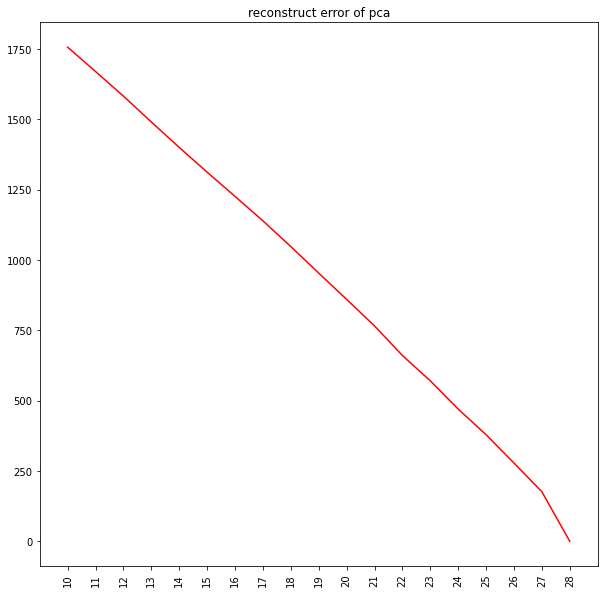

In [12]:
plt.clf()
plt.figure(figsize=(10,10))
plt.title("reconstruct error of pca")
plt.plot(rec_err,'r')
plt.xticks(range(len(rec_err)), range(10,max_col+1), rotation='vertical')
plt.xlim([-1, len(rec_err)])
plt.show()

### Randomized PCA

If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a stochastic algorithm called `Randomized PCA` that quickly finds an approximation of the first d principal components.

In [13]:
pca_rnd = PCA(n_components=21, svd_solver="randomized", random_state=42)
X_red_rnd = pca_rnd.fit_transform(X)

In [14]:
X_inv_rnd = pca_rnd.inverse_transform(X_red_rnd)
re_rnd = linalg.norm((X-X_inv_rnd), None)
print("Reconstruction Error with randomized svd_solver" , re_rnd)
print("Reconstruction Error with auto svd_solver", rec_err[11])

Reconstruction Error with randomized svd_solver 765.8799513206916
Reconstruction Error with auto svd_solver 765.8799513206916


Its computational complexity is $O(m \times d^2) + O(d^3)$, instead of $O(m \times n^2) + O(n^3)$ for the full SVD approach, so it is dramatically faster than full SVD when $d$ is much smaller than $n$. It also gives the same `reconstruction error` as in the full SVD method for this dataset.

In [15]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100

pca_inc = IncrementalPCA(n_components=21)
for X_batch in np.array_split(X, n_batches):
    pca_inc.partial_fit(X_batch)

X_red_inc = pca_inc.transform(X)

In [16]:
X_inv_inc = pca_rnd.inverse_transform(X_red_inc)
re_inc = linalg.norm((X-X_inv_inc), None)
print("Reconstruction Error with IncrementalPCA" , re_inc)
print("Reconstruction Error with default PCA", rec_err[11])

Reconstruction Error with IncrementalPCA 4565.400510577635
Reconstruction Error with default PCA 765.8799513206916


### Kernel PCA

The `kernel trick` is a mathematical technique that implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression with `Support Vector Machines`. Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space.

It turns out that the same trick can be applied to `PCA`, making it possible to perform complex nonlinear projections for dimensionality reduction. This is called `Kernel PCA (kPCA)`. It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

We import the make_moons dataset for this section.

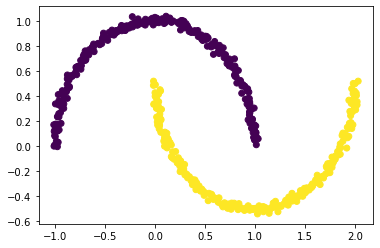

In [17]:
# Create a dataset which is nonlinear
from sklearn.datasets import make_moons
  
X_m, y_m = make_moons(n_samples = 500, noise = 0.02, random_state = 42)
  
plt.scatter(X_m[:, 0], X_m[:, 1], c = y_m)
plt.show()

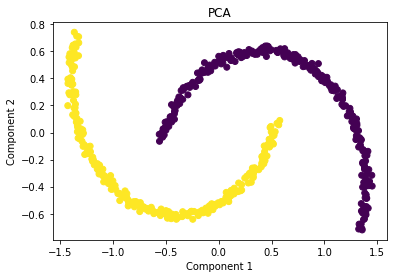

In [18]:
# Let’s apply PCA on this dataset
pca_m = PCA(n_components = 2, random_state=42)
X_m_pca = pca_m.fit_transform(X_m)
   
plt.title("PCA")
plt.scatter(X_m_pca[:, 0], X_m_pca[:, 1], c = y_m)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

As you can see PCA failed to distinguish the two classes. We will apply `kernel PCA` on this dataset with RBF kernel with a gamma value of 15.

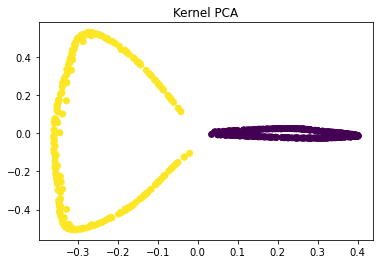

In [19]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel ='rbf', gamma = 15, random_state=42)
X_m_kpca = kpca.fit_transform(X_m)
  
plt.title("Kernel PCA")
plt.scatter(X_m_kpca[:, 0], X_m_kpca[:, 1], c = y_m)
plt.show()

In the kernel space the two classes are linearly separable. `Kernel PCA` uses a kernel function to project the dataset into a higher-dimensional space, where it is linearly separable.

As `kPCA` is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values. That said, dimensionality reduction is often a preparation step for a supervised learning task (e.g., classification), so you can use grid search to select the kernel and hyperparameters that lead to the best performance on that task. The following code creates a two-step pipeline, first reducing dimensionality to two dimensions using `kPCA`, then applying `Logistic Regression` for classification. Then it uses `GridSearchCV` to find the best kernel and gamma value for `kPCA` in order to get the best classification accuracy at the end of the pipeline.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(10, 20, 10),
        "kpca__kernel": ["rbf", "sigmoid", "linear"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_m, y_m)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([10.        , 11.11111111, 12.22222222, 13.33333333, 14.44444444,
       15.55555556, 16.66666667, 17.77777778, 18.88888889, 20.        ]),
                          'kpca__kernel': ['rbf', 'sigmoid', 'linear']}])

In [21]:
# best parameters
print(grid_search.best_params_)

{'kpca__gamma': 13.333333333333334, 'kpca__kernel': 'rbf'}


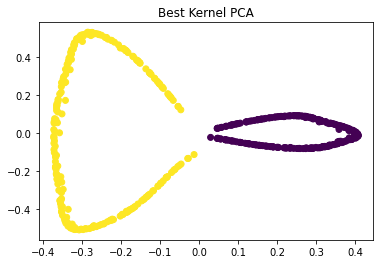

In [22]:
# with best params
kpca_best = KernelPCA(kernel ='rbf', gamma = 13.33, random_state=42)
X_m_kpca_best = kpca_best.fit_transform(X_m)
  
plt.title("Best Kernel PCA")
plt.scatter(X_m_kpca_best[:, 0], X_m_kpca_best[:, 1], c = y_m)
plt.show()

Notice that if we could invert the `linear PCA` step for a given instance in the reduced space, the reconstructed point would lie in feature space, not in the original space. Since the feature space is infinite-dimensional in case of a `kernel PCA`, we cannot compute the reconstructed point, and therefore we cannot compute the true reconstruction error. Fortunately, it is possible to find a point in the original space that would map close to the reconstructed point. 

The key is to train a supervised regression model, with the projected instances as the training set and the original instances as the targets. Scikit-Learn will do this automatically if we set `fit_inverse_transform=True`.

In [23]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=13.33, fit_inverse_transform=True)

X_m_rbf = rbf_pca.fit_transform(X_m)
X_preimage = rbf_pca.inverse_transform(X_m_rbf)

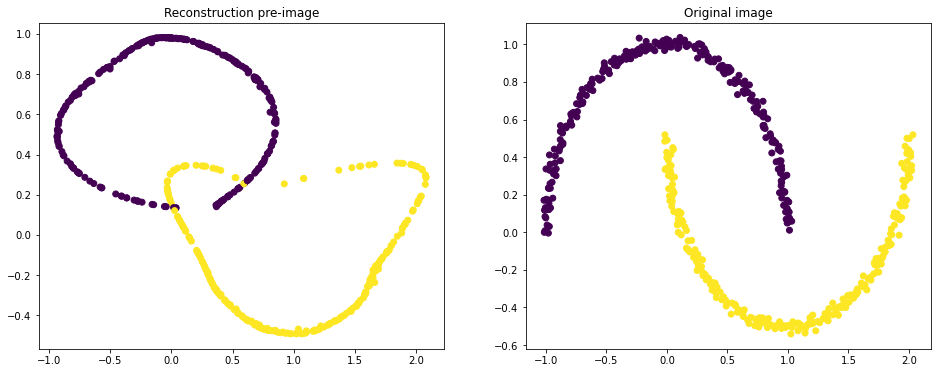

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title("Reconstruction pre-image")
ax1.scatter(X_preimage[:, 0], X_preimage[:, 1], c = y_m)

ax2.set_title("Original image")
ax2.scatter(X_m[:, 0], X_m[:, 1], c = y_m)

plt.show()

### Random Projection

`Random Projection` algorithm projects the data to a lower-dimensional space using a random linear projection. This may sound crazy, but it turns out that such a random projection is actually very likely to preserve distances fairly well, as was demonstrated by the Johnson–Lindenstrauss lemma:

* **Lemma**: Given $0 < \varepsilon < 1$, a set $X$ of $m \in \mathbb{Z}_{\ge 1} $ points in $\mathbb{R}^N (N \in \mathbb{Z}_{\ge 0})$, and an integer $n > 8(\ln m)/\varepsilon^2$, there is a linear map $f: \mathbb{R}^N \longrightarrow \mathbb{R}^n$ such that $$  (1-\varepsilon) \|u-v\|^2 \le \| f(u) - f(v) \|^2 \le (1+\varepsilon) \| u-v\| $$ for all $u,v\in X$.

In [25]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
m, epsilon = 50000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=epsilon)
d

9274

This is useful when we have a lot of features and less number of instances, *i.e.* $N > m$.

Scikit-Learn's `GaussianRandomProjection` class's `fit()` method uses `johnson_lindenstrauss_min_dim()` to determine the output dimensionality. Then it generates a random matrix, which it stores in the `components_` attribute. When the `transform()` method is called, it uses this matrix to perform the projection. When creating the transformer, one can set `eps` to tweak $\varepsilon$ (it defaults to 0.1), and `n_components` to force a specific target dimensionality $d$.

In [26]:
X_dummy = np.random.randn(5000, 20000)   # create a dummy dataset of 5000 instances and 20000 features (dimensions)

from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=epsilon, random_state=42)
X_gaussian = gaussian_rnd_proj.fit_transform(X_dummy)

In [28]:
print("Reduced dimensions:", X_gaussian.shape[1])

Reduced dimensions: 7300


### Locally Linear Embedding

`Locally Linear Embedding (LLE)⁠` is a nonlinear dimensionality reduction (NLDR) technique. It is a `Manifold Learning` technique that does not rely on projections, unlike `PCA` and `Random Projection`. In a nutshell, `LLE` works by first measuring how each training instance linearly relates to its nearest neighbors, and then looking for a low-dimensional representation of the training set where these local relationships are best preserved.

In [29]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

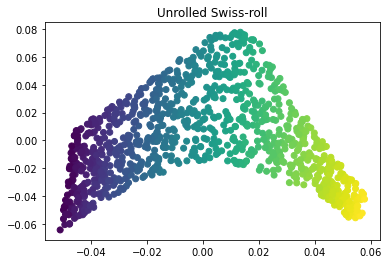

In [30]:
plt.title("Unrolled Swiss-roll")
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=t)
plt.show()

In [34]:
from sklearn.manifold import MDS, Isomap, TSNE

mds = MDS(n_components=2, random_state=42)
iso = Isomap(n_components=2, n_neighbors=10)
tsne = TSNE(n_components=2, random_state=42)

In [35]:
X_mds = mds.fit_transform(X_swiss)
X_iso = iso.fit_transform(X_swiss)
X_tsne = tsne.fit_transform(X_swiss)

c:\Users\16044\anaconda3\envs\hands_on_ml\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\16044\anaconda3\envs\hands_on_ml\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


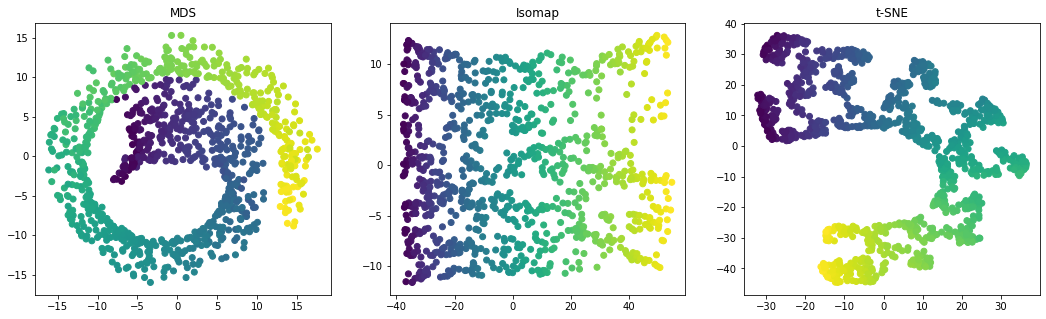

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))

ax1.set_title("MDS")
ax1.scatter(X_mds[:,0], X_mds[:, 1], c=t)

ax2.set_title("Isomap")
ax2.scatter(X_iso[:,0], X_iso[:, 1], c=t)

ax3.set_title("t-SNE")
ax3.scatter(X_tsne[:,0], X_tsne[:, 1], c=t)

plt.show()

The figure shows the results of `MDS`, `Isomap` and `t-SNE` on the *Swiss roll*. `MDS` manages to flatten the *Swiss roll* without losing its global curvature, while `Isomap` drops it entirely. As for `t-SNE`, it did a reasonable job in flattening the *Swiss roll*, preserving a bit of curvature, and it also amplified clusters, tearing the roll apart.